In [1]:
import torch

torch.__version__

'2.0.1'

## 텐서 초기화와 데이터 타입

초기화 되지 않은 텐서

In [2]:
x = torch.empty(4, 2)
print(x)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])


무작위로 초기화된 텐서

In [4]:
x = torch.rand(4, 2)
print(x)

tensor([[0.5817, 0.6150],
        [0.6206, 0.1391],
        [0.2404, 0.7883],
        [0.2618, 0.7602]])


데이터 타입(dtype)이 long이고, 0으로 채워진 텐서

In [5]:
x = torch.zeros(4, 2, dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


사용자가 입력한 값으로 텐서 초기화

In [13]:
x = torch.tensor([3, 2.3])
print(x)

tensor([3.0000, 2.3000])


2 x 4 크기, double 타입, 1로 채워진 텐서

In [14]:
x = x.new_ones(2, 4, dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


x와 같은 크기, float 타입, 무작위로 채워진 텐서

In [15]:
x = torch.randn_like(x, dtype=torch.float) # randn_like : 같은 크기
print(x)

tensor([[ 0.5268, -0.6141, -0.5529, -0.7373],
        [ 1.3448,  0.4338, -0.0226, -0.4550]])


텐서의 크기 계산

In [16]:
print(x.size())

torch.Size([2, 4])


## 데이터 타입(Data Type)
| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |

In [17]:
ft = torch.FloatTensor([1, 2, 3])
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [19]:
print(ft.short())
print(ft.int())
print(ft.long())

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [20]:
it = torch.IntTensor([1, 2, 3])
print(it)
print(it.dtype)

tensor([1, 2, 3], dtype=torch.int32)
torch.int32


In [21]:
print(it.float())
print(it.double())
print(it.half())

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


## CUDA Tensors
- .to 메소드를 사용하여 텐서를 어떠한 장치(cpu, gpu)로도 옮길 수 있음

In [24]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.8723])
0.8723021745681763
torch.float32


In [26]:
# torch.cuda.is_available()
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
print(device)

mps


In [28]:
y = torch.ones_like(x, device=device)
print(y)
x = x.to(device)
print(x)
z = x + y
print(z)
print(z.to('cpu'), torch.double)

tensor([1.], device='mps:0')
tensor([0.8723], device='mps:0')
tensor([1.8723], device='mps:0')
tensor([1.8723]) torch.float64


## 다차원 텐서 표현

### 0D Tensor(Scalar)
- 하나의 숫자를 담고 있는 텐서(tensor)
- 축과 형상이 없음

In [29]:
t0 = torch.tensor(0)
print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


### 1D Tensor(Vector)
- 값들을 저장한 리스트와 유사한 텐서
- 하나의 축이 존재

In [30]:
t1 = torch.tensor([1, 2, 3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


### 2D Tensor(Matrix)
- 행렬과 같은 모양으로 두 개의 축이 존재 
- 일반적인 수치, 통계 데이터셋이 해당
- 주로 샘플(sample)과 특성(feature)을 가진 구조로 사용
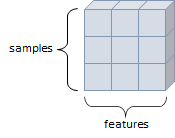

In [32]:
t2 = torch.tensor([[1, 2, 3], 
                   [4, 5, 6], 
                   [7, 8, 9]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


### 3D Tensor
- 큐브(cube)와 같은 모양으로 세 개의 축이 존재
- 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
- 주식 가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재
- 주로 샘플(sample), 타임스텝(time steps), 특성(features)을 가진 구조로 사용
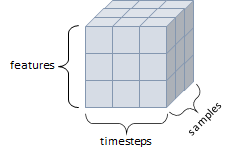

In [33]:
t3 = torch.tensor([[[1, 2, 3], 
                    [4, 5, 6], 
                    [7, 8, 9]],
                   [[1, 2, 3], 
                    [4, 5, 6], 
                    [7, 8, 9]],
                   [[1, 2, 3], 
                    [4, 5, 6], 
                    [7, 8, 9]]])
print(t3.ndim)
print(t3.shape)
print(t3)

3
torch.Size([3, 3, 3])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


### 4D Tensor
- 4개의 축
- 컬러 이미지 데이터가 대표적인 사례(흑백 이미지 데이터는 3D Tensor로 가능)
- 주로 샘플(samples), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용
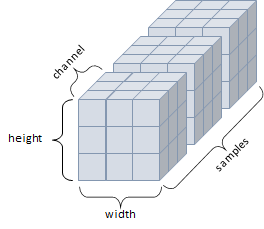

### 5D Tensor
- 5개의 축
- 비디오 데이터가 대표적인 사례
- 주로 샘플(samples), 프레임(frames), 높아(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

## 텐서의 연산(Operations)
- 텐서에 대한 수학 연산, 삼각함수, 비트 연산, 비교 연산, 집계 등 제공

In [39]:
import math

a = torch.rand(1, 2) * 2 - 1
print(a)
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5, 0.5))

tensor([[0.6093, 0.9157]])
tensor([[0.6093, 0.9157]])
tensor([[1., 1.]])
tensor([[0., 0.]])
tensor([[0.5000, 0.5000]])


In [42]:
print(a)
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a)) # product 계산
print(torch.unique(torch.tensor([1, 2, 3, 1, 2, 2])))

tensor([[0.6093, 0.9157]])
tensor(0.6093)
tensor(0.9157)
tensor(0.7625)
tensor(0.2167)
tensor(0.5580)
tensor([1, 2, 3])


max와 min은 dim 인자를 줄 경우 argmax와 argmin도 함께 리턴
- argmax : 최대값을 가진 인덱스
- argmin : 최소값을 가진 인덱스

In [43]:
x = torch.rand(2, 2)
print(x)
print(x.max(dim=0)) # 0.7820과 0.7184 비교
print(x.max(dim=1)) # 0.7820과 0.1306 비교

tensor([[0.7820, 0.1306],
        [0.7184, 0.1092]])
torch.return_types.max(
values=tensor([0.7820, 0.1306]),
indices=tensor([0, 0]))
torch.return_types.max(
values=tensor([0.7820, 0.7184]),
indices=tensor([0, 0]))


In [44]:
x = torch.rand(2, 2)
print(x)
print(x.min(dim=0)) # 0.7820과 0.7184 비교
print(x.min(dim=1)) # 0.7820과 0.1306 비교

tensor([[0.7472, 0.4846],
        [0.6122, 0.2054]])
torch.return_types.min(
values=tensor([0.6122, 0.2054]),
indices=tensor([1, 1]))
torch.return_types.min(
values=tensor([0.4846, 0.2054]),
indices=tensor([1, 1]))


In [45]:
x = torch.rand(2, 2)
print(x)
y = torch.rand(2, 2)
print(y)


tensor([[0.4113, 0.9770],
        [0.2118, 0.7906]])
tensor([[0.2601, 0.1089],
        [0.3101, 0.1282]])


torch.add : 덧셈

In [47]:
print(x + y)
print(torch.add(x, y))

tensor([[0.6714, 1.0859],
        [0.5218, 0.9187]])
tensor([[0.6714, 1.0859],
        [0.5218, 0.9187]])


결과 텐서를 인자로 제공

In [50]:
result = torch.empty(2, 4)
print(result)
torch.add(x, y, out=result)
print(result)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.6714, 1.0859],
        [0.5218, 0.9187]])


/var/folders/bx/kws8rd4525gfj8xnyb4pbjrh0000gn/T/ipykernel_16388/1506283865.py:3: UserWarning: An output with one or more elements was resized since it had shape [2, 4], which does not match the required output shape [2, 2]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/Resize.cpp:33.)
  torch.add(x, y, out=result)


in-place 방식
- in-place 방식으로 텐서의 값을 변경하는 연산 뒤에 _"가 붙음
- x.copy_(y), x.t_()

In [51]:
print(x)
print(y)
y.add_(x) # y에 값을 x에 더한 값을 y에 저장
print(y)

tensor([[0.4113, 0.9770],
        [0.2118, 0.7906]])
tensor([[0.2601, 0.1089],
        [0.3101, 0.1282]])
tensor([[0.6714, 1.0859],
        [0.5218, 0.9187]])


torch.sub : 뺄셈

In [52]:
print(x)
print(y)
print(x - y)
print(torch.sub(x, y))
print(x.sub(y))

tensor([[0.4113, 0.9770],
        [0.2118, 0.7906]])
tensor([[0.6714, 1.0859],
        [0.5218, 0.9187]])
tensor([[-0.2601, -0.1089],
        [-0.3101, -0.1282]])
tensor([[-0.2601, -0.1089],
        [-0.3101, -0.1282]])
tensor([[-0.2601, -0.1089],
        [-0.3101, -0.1282]])


torch.mul : 곱셈

In [53]:
print(x)
print(y)
print(x * y)
print(torch.mul(x, y))
print(x.mul(y))

tensor([[0.4113, 0.9770],
        [0.2118, 0.7906]])
tensor([[0.6714, 1.0859],
        [0.5218, 0.9187]])
tensor([[0.2762, 1.0609],
        [0.1105, 0.7263]])
tensor([[0.2762, 1.0609],
        [0.1105, 0.7263]])
tensor([[0.2762, 1.0609],
        [0.1105, 0.7263]])


torch.div : 나눗셈

In [54]:
print(x)
print(y)
print(x / y)
print(torch.div(x, y))
print(x.div(y))

tensor([[0.4113, 0.9770],
        [0.2118, 0.7906]])
tensor([[0.6714, 1.0859],
        [0.5218, 0.9187]])
tensor([[0.6126, 0.8997],
        [0.4058, 0.8605]])
tensor([[0.6126, 0.8997],
        [0.4058, 0.8605]])
tensor([[0.6126, 0.8997],
        [0.4058, 0.8605]])


torch.mm : 내적(dot product)

In [55]:
print(x)
print(y)
print(torch.matmul(x, y))
z = torch.mm(x, y)
print(z)
print(torch.svd(z)) # 행렬 분해?

tensor([[0.4113, 0.9770],
        [0.2118, 0.7906]])
tensor([[0.6714, 1.0859],
        [0.5218, 0.9187]])
tensor([[0.7860, 1.3442],
        [0.5547, 0.9563]])
tensor([[0.7860, 1.3442],
        [0.5547, 0.9563]])
torch.return_types.svd(
U=tensor([[-0.8154, -0.5789],
        [-0.5789,  0.8154]]),
S=tensor([1.9097, 0.0031]),
V=tensor([[-0.5038, -0.8638],
        [-0.8638,  0.5038]]))


## 텐서의 조작(Manipulations)

### 인덱싱(Indexing): Numpy처럼 인덱싱 형태로 사용가능

In [59]:
x = torch.Tensor([[1, 2],
                  [3, 4]])
print(x)

print(x[0, 0])
print(x[0, 1])
print(x[1, 0])
print(x[1, 1])

print(x[:, 0])
print(x[:, 1])

print(x[0, :])
print(x[1, :])

tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.)
tensor([1., 3.])
tensor([2., 4.])
tensor([1., 2.])
tensor([3., 4.])


view : 텐서의 크기(size)나 모양(shape)을 변경
- 기본적으로 변경 전과 후에 텐서 안의 원소 개수가 유지되어야 함
- -1로 설정되면 계산을 통해 해당 크기값을 유추

In [64]:
x = torch.randn(4, 5)
print(x)
y = x.view(20)
print(y)
z = x.view(5, -1) # 5개를 지정할테니 -1 나머지는 알아서 해줘
print(z)

tensor([[-1.1115,  1.2062, -0.5737,  0.2849, -0.2363],
        [-0.1616,  1.1897,  0.2586,  1.2292,  0.4906],
        [-0.1103, -2.1443, -0.7421, -1.3547, -0.2947],
        [ 0.8718, -0.2334,  2.0125,  0.5583,  0.6020]])
tensor([-1.1115,  1.2062, -0.5737,  0.2849, -0.2363, -0.1616,  1.1897,  0.2586,
         1.2292,  0.4906, -0.1103, -2.1443, -0.7421, -1.3547, -0.2947,  0.8718,
        -0.2334,  2.0125,  0.5583,  0.6020])
tensor([[-1.1115,  1.2062, -0.5737,  0.2849],
        [-0.2363, -0.1616,  1.1897,  0.2586],
        [ 1.2292,  0.4906, -0.1103, -2.1443],
        [-0.7421, -1.3547, -0.2947,  0.8718],
        [-0.2334,  2.0125,  0.5583,  0.6020]])


item : 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음

In [65]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([1.2780])
1.2780425548553467
torch.float32


스칼라값 하나만 존재해야 item() 사용 가능

In [67]:
x = torch.randn(2)
print(x)
# print(x.item())
# RuntimeError: a Tensor with 2 elements cannot be converted to Scalar
print(x.dtype)

tensor([-0.6660,  2.0794])
torch.float32


squeeze : 차원을 축소(제거)

In [68]:
tensor = torch.rand(1, 3, 3) # 1 x 3 x 3
print(tensor)
print(tensor.shape)

tensor([[[0.8818, 0.6045, 0.6971],
         [0.2611, 0.0606, 0.0899],
         [0.3329, 0.2897, 0.4258]]])
torch.Size([1, 3, 3])


In [69]:
t = tensor.squeeze()
print(t)
print(t.shape)

tensor([[0.8818, 0.6045, 0.6971],
        [0.2611, 0.0606, 0.0899],
        [0.3329, 0.2897, 0.4258]])
torch.Size([3, 3])


unsqueeze : 차원을 증가(생성)

In [70]:
t = torch.rand(3, 3)
print(t)
print(t.shape)

tensor([[0.0509, 0.5194, 0.2714],
        [0.2095, 0.1421, 0.8488],
        [0.8263, 0.8785, 0.5627]])
torch.Size([3, 3])


In [71]:
tensor = t.unsqueeze(dim=0) # 첫 번째 차원을 기준으로 unsqueeze
print(tensor)
print(tensor.shape)

tensor([[[0.0509, 0.5194, 0.2714],
         [0.2095, 0.1421, 0.8488],
         [0.8263, 0.8785, 0.5627]]])
torch.Size([1, 3, 3])


In [72]:
tensor = t.unsqueeze(dim=2) # 세 번째 차원을 기준으로 unsqueeze
print(tensor)
print(tensor.shape)

tensor([[[0.0509],
         [0.5194],
         [0.2714]],

        [[0.2095],
         [0.1421],
         [0.8488]],

        [[0.8263],
         [0.8785],
         [0.5627]]])
torch.Size([3, 3, 1])


stack : 텐서간 결합

In [73]:
x = torch.FloatTensor([1, 4])
print(x)
y = torch.FloatTensor([2, 5])
print(y)
z = torch.FloatTensor([3, 6])
print(z)

print(torch.stack([x, y, z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


cat : 텐서를 결합하는 메소드(concatenate)
- 넘파이의 stack과 유사하지만, 쌓을 dim이 존재해야함
- 해당 차원을 늘려준 후 결합

In [75]:
a = torch.randn(1, 3, 3)
print(a)
b = torch.randn(1, 3, 3)
print(b)

c = torch.cat((a, b), dim=0) # 첫 번째 차원 기준
print(c)
print(c.size())

tensor([[[ 1.5696,  0.9413,  0.4731],
         [ 0.6237, -0.2159, -1.5907],
         [ 1.3120, -1.5403, -0.7232]]])
tensor([[[ 0.5033,  1.2308,  0.9866],
         [-1.7712,  1.3228, -1.0307],
         [ 1.8235,  0.1754, -0.1697]]])
tensor([[[ 1.5696,  0.9413,  0.4731],
         [ 0.6237, -0.2159, -1.5907],
         [ 1.3120, -1.5403, -0.7232]],

        [[ 0.5033,  1.2308,  0.9866],
         [-1.7712,  1.3228, -1.0307],
         [ 1.8235,  0.1754, -0.1697]]])
torch.Size([2, 3, 3])


In [76]:
c = torch.cat((a, b), dim=1) # 두 번째 차원 기준
print(c)
print(c.size())

tensor([[[ 1.5696,  0.9413,  0.4731],
         [ 0.6237, -0.2159, -1.5907],
         [ 1.3120, -1.5403, -0.7232],
         [ 0.5033,  1.2308,  0.9866],
         [-1.7712,  1.3228, -1.0307],
         [ 1.8235,  0.1754, -0.1697]]])
torch.Size([1, 6, 3])


In [77]:
c = torch.cat((a, b), dim=2) # 세 번째 차원 기준
print(c)
print(c.size())

tensor([[[ 1.5696,  0.9413,  0.4731,  0.5033,  1.2308,  0.9866],
         [ 0.6237, -0.2159, -1.5907, -1.7712,  1.3228, -1.0307],
         [ 1.3120, -1.5403, -0.7232,  1.8235,  0.1754, -0.1697]]])
torch.Size([1, 3, 6])


chunk : 텐서를 여러 개로 나눌 때 사용 (몇 개로 나눌 것인가?)

In [82]:
print(torch.rand(1, 2))
print(torch.randn(1, 2))

tensor([[0.5893, 0.7150]])
tensor([[-0.2001,  0.0777]])


In [87]:
tensor = torch.rand(3, 6)
print(tensor)
print()

t1, t2, t3 = torch.chunk(tensor, chunks=3, dim=1) # 두 번째 차원 기준
# chunks=3 : 3부분으로 나눈다
print(t1)
print(t2)
print(t3)

tensor([[0.7674, 0.7503, 0.7651, 0.3907, 0.4330, 0.5340],
        [0.7142, 0.9749, 0.9966, 0.0841, 0.2173, 0.0897],
        [0.1859, 0.5890, 0.3124, 0.4185, 0.9182, 0.3102]])

tensor([[0.7674, 0.7503],
        [0.7142, 0.9749],
        [0.1859, 0.5890]])
tensor([[0.7651, 0.3907],
        [0.9966, 0.0841],
        [0.3124, 0.4185]])
tensor([[0.4330, 0.5340],
        [0.2173, 0.0897],
        [0.9182, 0.3102]])


split : chunk와 동일한 기능이지만 조금 다름 (텐서의 크기는 몇인가?)

In [89]:
tensor = torch.rand(3, 6)
print(tensor)
print()

t1, t2 = torch.split(tensor, split_size_or_sections=3, dim=1)
# split_size_or_sections=3 : 3의 크기로 나눈다
print(t1)
print(t2)

tensor([[0.7281, 0.8277, 0.6886, 0.0077, 0.2406, 0.3315],
        [0.0057, 0.9933, 0.5972, 0.7085, 0.2679, 0.0937],
        [0.3427, 0.3659, 0.7071, 0.2790, 0.9554, 0.3635]])

tensor([[0.7281, 0.8277, 0.6886],
        [0.0057, 0.9933, 0.5972],
        [0.3427, 0.3659, 0.7071]])
tensor([[0.0077, 0.2406, 0.3315],
        [0.7085, 0.2679, 0.0937],
        [0.2790, 0.9554, 0.3635]])


torch <-> numpy
- Torch Tensor(텐서)를 Numpy array(배열)로 변환 가능
    - `numpy()`
    - `from_numpy()`
- Tensor가 CPU상에 있다면 NumPy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [91]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [92]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [94]:
a.add_(1)
print(a)
print(b) # numpy array는 메모리 공간을 공유하기 때문에 a가 변하면 b도 변함

tensor([3., 3., 3., 3., 3., 3., 3.])
[3. 3. 3. 3. 3. 3. 3.]


In [95]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a) # add_()
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## Autograd(자동미분)
- `torch.autograd` 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공
    - 자동 미분 : 미분 값을 역전파 시킬 수 있도록 자동 계산하는 것
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- `backprop`를 위해 미분값을 자동으로 계산

`requires_gard` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

기록을 추적하는 것을 중단하게 하려면, `.detach()` 를 호출하여 연산기록으로부터 분리

In [96]:
a = torch.randn(3, 3)
a = a * 3
print(a)
print(a.requires_grad)

tensor([[-0.0286,  1.5922,  4.9128],
        [ 1.1592,  2.7262,  0.5132],
        [-3.8962, -1.5720,  3.1760]])
False


`requires_grad_(...)` 는 기존 텐서의 requires_grad 값을 바꿔치기(`in-place`)하여 변경

grad_fn : 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

In [98]:
a.requires_grad_(True) # inplace 연산
print(a.requires_grad)

b = (a * a).sum()
print(b) # grad_fn=<SumBackward0>
print(b.grad_fn)

True
tensor(63.4496, grad_fn=<SumBackward0>)


## 기울기(Gradient)

In [99]:
x = torch.ones(3, 3, requires_grad=True) # 3 x 3
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [100]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [103]:
z = y * y
out = z.mean()
print(z, out)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


계산이 완료된 후, `.backward()` 를 호출하면 자동으로 역전파 계산이 가능하고, `.grad` 속성에 누적됨

In [104]:
print(out)

out.backward()

tensor(36., grad_fn=<MeanBackward0>)


`grad` : **data**가 거쳐온 layer에 대한 미분값 저장

In [105]:
print(x)
print(x.grad)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


In [106]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2
    
print(y)

tensor([-1031.7646,   617.6121,  1072.3253], grad_fn=<MulBackward0>)


In [107]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


`with torch.no_grad()` 를 사용하여 기울기의 업데이트를 하지 않음

기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad()` 로 감싸면 기울기 계산은 필요 없지만, `requires_grad=True` 로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

In [108]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad(): # 기울기 계산 x
    print((x ** 2).requires_grad)

True
True
False


`detach()` : 내용물(content)은 같지만 `require_grad` 가 다른 새로운 Tensor를 가져올 때

In [109]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


## 자동 미분 흐름 예제

- 계산 흐름 $a \rightarrow b  \rightarrow c  \rightarrow out $

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해 $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면 $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐

In [110]:
a = torch.ones(2, 2) # 2x2
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [111]:
a = torch.ones(2, 2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [112]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
None
None


$b = a + 2$

In [113]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


$c = b^2$ 

In [114]:
c = b ** 2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [115]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [116]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


a의 `grad_fn`이 None인 이유는 직접적으로 계산한 부분이 없었기 때문

In [119]:
print(a.data)
print(a.grad)
print(a.grad_fn) # a의 값을 직접적으로 사용한 건 아님

tensor([[1., 1.],
        [1., 1.]])
tensor([[6., 6.],
        [6., 6.]])
None


In [120]:
print(b.data)
print(b.grad)
print(b.grad_fn)

tensor([[3., 3.],
        [3., 3.]])
None


/var/folders/bx/kws8rd4525gfj8xnyb4pbjrh0000gn/T/ipykernel_16388/2485455394.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:491.)
  print(b.grad)


In [122]:
print(c.data)
print(c.grad)
print(c.grad_fn)

tensor([[9., 9.],
        [9., 9.]])
None


/var/folders/bx/kws8rd4525gfj8xnyb4pbjrh0000gn/T/ipykernel_16388/3875808255.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:491.)
  print(c.grad)


In [123]:
print(out.data)
print(out.grad)
print(out.grad_fn)

tensor(36.)
None


/var/folders/bx/kws8rd4525gfj8xnyb4pbjrh0000gn/T/ipykernel_16388/578081240.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:491.)
  print(out.grad)


## 데이터 준비

파이토치에서는 데이터 준비를 위해 `torch.utils.data`의 `Dataset`과 `DataLoader` 사용 가능

- `Dataset`에는 다양한 데이터셋이 존재 (MNIST, FashionMNIST, CIFAR10, ...)
  - Vision Dataset: https://pytorch.org/vision/stable/datasets.html
  - Text Dataset: https://pytorch.org/text/stable/datasets.html
  - Audio Dataset: https://pytorch.org/audio/stable/datasets.html
- `DataLoader`와 `Dataset`을 통해 `batch_size`, `train` 여부, `transform` 등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [124]:
from torch.utils.data import Dataset, DataLoader

토치비전(`torchvision`)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지

- `transforms`: 전처리할 때 사용하는 메소드 (https://pytorch.org/docs/stable/torchvision/transforms.html)
- `transforms`에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행


In [125]:
import torchvision.transforms as transforms
from torchvision import datasets

`DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있고, `Compose`를 통해 리스트 안에 순서대로 전처리 진행

`ToTensor`()를 하는 이유는 `torchvision`이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor형으로 변환 필요

In [126]:
mnist_transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(mean=(0.5,), std=(1.0,))])

In [128]:
trainset = datasets.MNIST(root='./0_9/',
                          train=True,
                          download=True,
                          transform=mnist_transform)

testset = datasets.MNIST(root='./0_9/',
                         train=False,
                         download=True,
                         transform=mnist_transform)

Processing...
Done!


`DataLoader`는 데이터 전체를 보관했다가 실제 모델 학습을 할 때 `batch_size` 크기만큼 데이터를 가져옴

In [132]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2) # shuffle : 데이터 섞기
test_loader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

In [135]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images.shape, labels.shape # 배치사이즈가 8 이기에 8, 1, 28, 28

/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/torchvision/transforms/functional.py:63: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/torchvision/transforms/functional.py:63: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))


(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [137]:
print(images[0].shape)
torch_image = torch.squeeze(images[0])
print(torch_image.shape)

torch.Size([1, 28, 28])
torch.Size([28, 28])


/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/torchvision/transforms/functional.py:63: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))


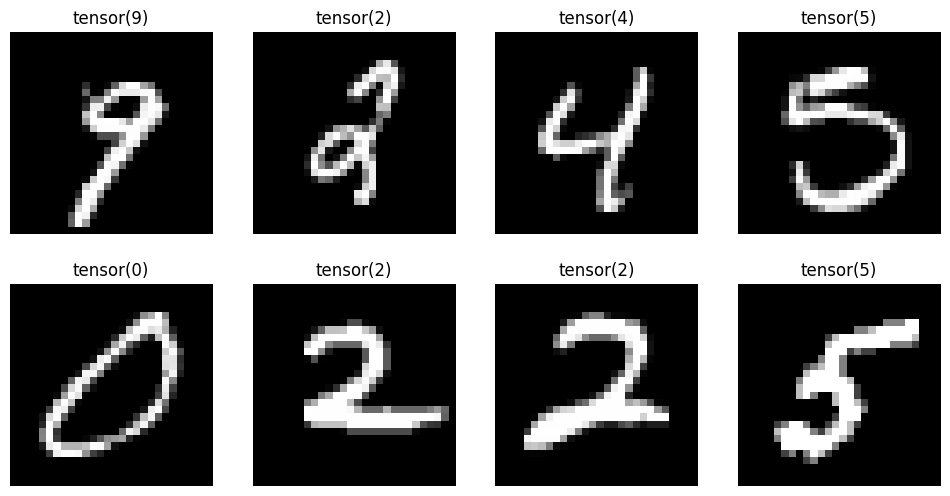

In [138]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12, 6))
cols, rows = 4, 2

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainset), size=(1,)).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

## 신경망 구성

- 레이어(layer): 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력
- 모듈(module): 한 개 이상의 계층이 모여서 구성
- 모델(model): 한 개 이상의 모듈이 모여서 구성


### `torch.nn` 패키지

주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용 (`weight`값들을 직접 선언 안함)

https://pytorch.org/docs/stable/nn.html


In [139]:
import torch.nn as nn

`nn.Linear` 계층 예제

In [141]:
input = torch.randn(128, 20)
print(input)

m = nn.Linear(in_features=20, out_features=30) 
print(m)

output = m(input)
print(output)
print(output.shape)

tensor([[-0.4578, -0.5797, -2.2533,  ..., -1.5372, -0.4137, -0.0644],
        [-0.3815, -0.5561, -1.1479,  ..., -0.4748, -0.9308,  0.8949],
        [-0.8958,  0.1496,  0.2757,  ...,  1.3035,  0.2116,  0.0188],
        ...,
        [-1.0606,  0.4914,  0.2335,  ...,  0.4559,  0.5246, -0.2389],
        [-1.3307,  1.2612,  0.2295,  ..., -0.8247, -0.5503,  0.7583],
        [ 0.9655,  0.3439, -1.8541,  ..., -1.3189,  1.1909, -0.7192]])
Linear(in_features=20, out_features=30, bias=True)
tensor([[ 1.1127,  0.4184,  0.9445,  ...,  1.2120,  0.4156, -1.1465],
        [ 0.3168,  0.2892,  0.7948,  ...,  0.7373,  0.7252, -0.0915],
        [-0.5718,  0.2552, -1.0333,  ..., -1.2567, -0.0319,  0.5036],
        ...,
        [-0.0665, -0.4257, -0.8681,  ..., -0.1714, -0.7336, -0.6983],
        [-0.4566,  0.6728, -0.7160,  ..., -0.0315,  0.7026,  0.5972],
        [ 0.0518,  0.4465,  0.0885,  ...,  0.3716,  0.2823,  0.2649]],
       grad_fn=<AddmmBackward0>)
torch.Size([128, 30])


`nn.Conv2d` 계층 예시


In [146]:
input = torch.randn(20, 16, 50, 100)
print(input.size())
print(input.shape)

torch.Size([20, 16, 50, 100])
torch.Size([20, 16, 50, 100])


In [149]:
m = nn.Conv2d(16, 33, 3, stride=2)
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
m = nn.Conv2d(in_channels=16, 
              out_channels=33, 
              kernel_size=(3, 5), 
              stride=(2, 1), 
              padding=(4, 2), 
              dilation=(3, 1))
print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [150]:
output = m(input)
print(output.size())

torch.Size([20, 33, 26, 100])


### 컨볼루션 레이어(Convolution Layers)

`nn.Conv2d` 예제

- `in_channels`: channel의 갯수
- `out_channels`: 출력 채널의 갯수
- `kernel_size`: 커널(필터) 사이즈

In [151]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [152]:
layer = nn.Conv2d(1, 20, 5 ,1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

`weight` 확인

In [154]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

`weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [155]:
weight = weight.detach()

In [156]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

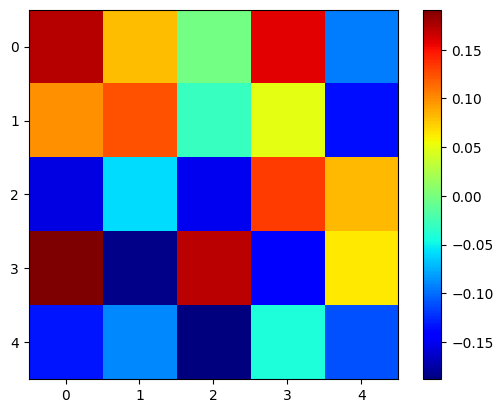

In [159]:
plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()
plt.show();

In [160]:
print(images.shape) # batch_size : 8
print(images[0].size())

input_image = torch.squeeze(images[0])
print(input_image.size())

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


In [162]:
input_data = torch.unsqueeze(images[0], dim=0)
print(input_data.size()) # 흑백 사진 한장

output_data = layer(input_data)
output = output_data.data # data만 뽑기
output_arr = output.numpy()
output_arr.shape

torch.Size([1, 1, 28, 28])


(1, 20, 24, 24)

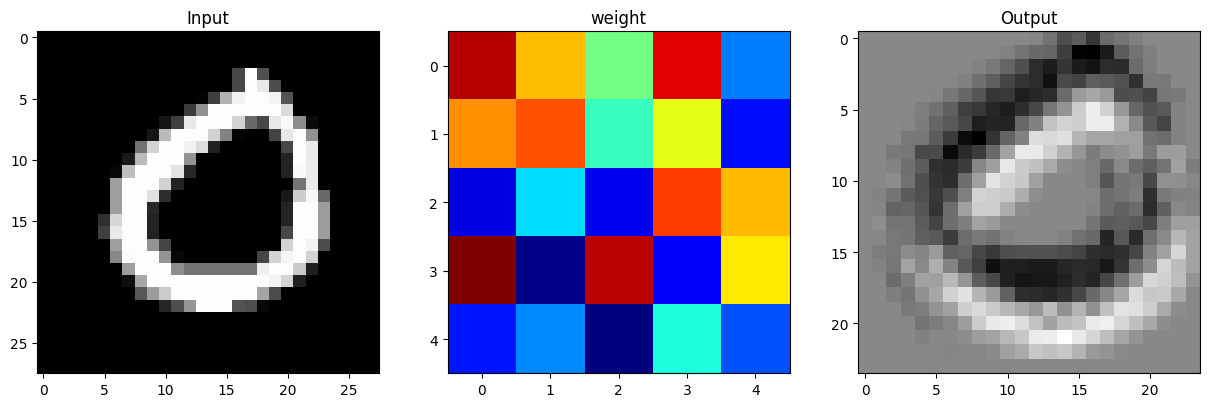

In [163]:
plt.figure(figsize=(15, 30))

plt.subplot(131)
plt.title('Input')
plt.imshow(input_image, 'gray')

plt.subplot(132)
plt.title('weight')
plt.imshow(weight[0, 0, :, :], 'jet')

plt.subplot(133)
plt.title('Output')
plt.imshow(output_arr[0, 0, :, :], 'gray')

### 풀링 레이어(Pooling layers)

- `F.max_pool2d` 
  - `stride`
  - `kernel_size`
- `torch.nn.MaxPool2d` 도 많이 사용

In [164]:
import torch.nn.functional as F

pool = F.max_pool2d(output, 2, 2)
pool.shape

torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

In [165]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

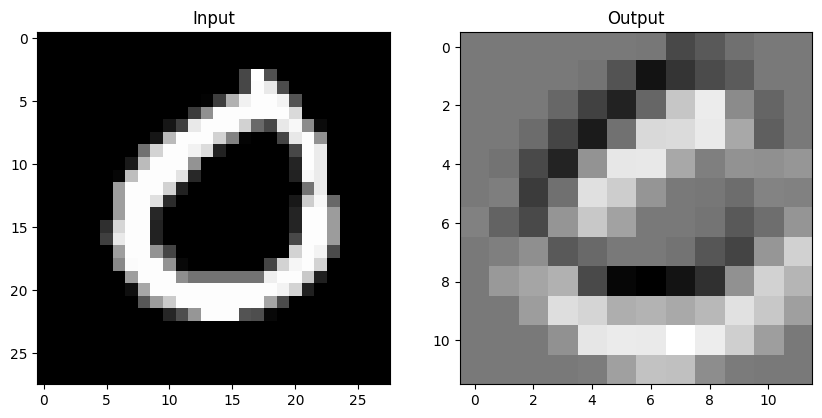

In [169]:
plt.figure(figsize=(10, 15))

plt.subplot(121)
plt.title('Input')
plt.imshow(input_image, 'gray')

plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0, 0, :, :], 'gray')

plt.show()

### 선형 레이어(Linear layers)

1d만 가능하므로 `.view()`를 통해 1d로 펼쳐줘야함

In [171]:
flatten = input_image.view(1, 28 * 28)
flatten.shape

torch.Size([1, 784])

In [173]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [174]:
lin

tensor([[ 0.4143, -0.4816, -0.2075,  0.5095,  0.3328, -0.0550,  0.7018,  0.0475,
          0.0150, -0.3362]], grad_fn=<AddmmBackward0>)

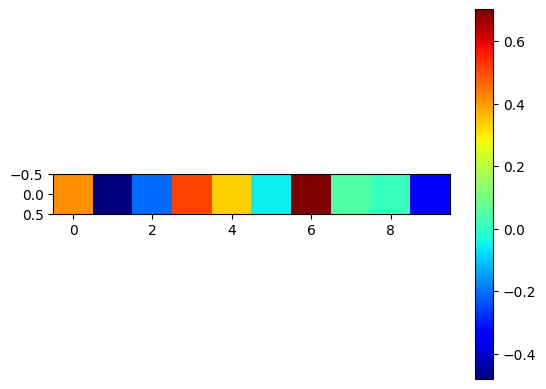

In [175]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

### 비선형 활성화 (Non-linear Activations)

`F.softmax`와 같은 활성화 함수 등

In [176]:
with torch.no_grad():
    flatten = input_image.view(1, 28 * 28)
    lin = nn.Linear(784, 10)(flatten)
    softmax = F.softmax(lin, dim=1)
    
softmax

tensor([[0.0770, 0.1247, 0.0795, 0.0975, 0.0956, 0.0713, 0.1431, 0.1127, 0.0851,
         0.1136]])

In [182]:
np.sum(softmax.numpy())

0.9999999

`F.relu`

- ReLU 함수를 적용하는 레이어
- `nn.ReLU`로도 사용 가능

In [183]:
inputs = torch.randn(4, 3, 28, 28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [184]:
layer = nn.Conv2d(3, 20, 5, 1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

### 신경망 종류

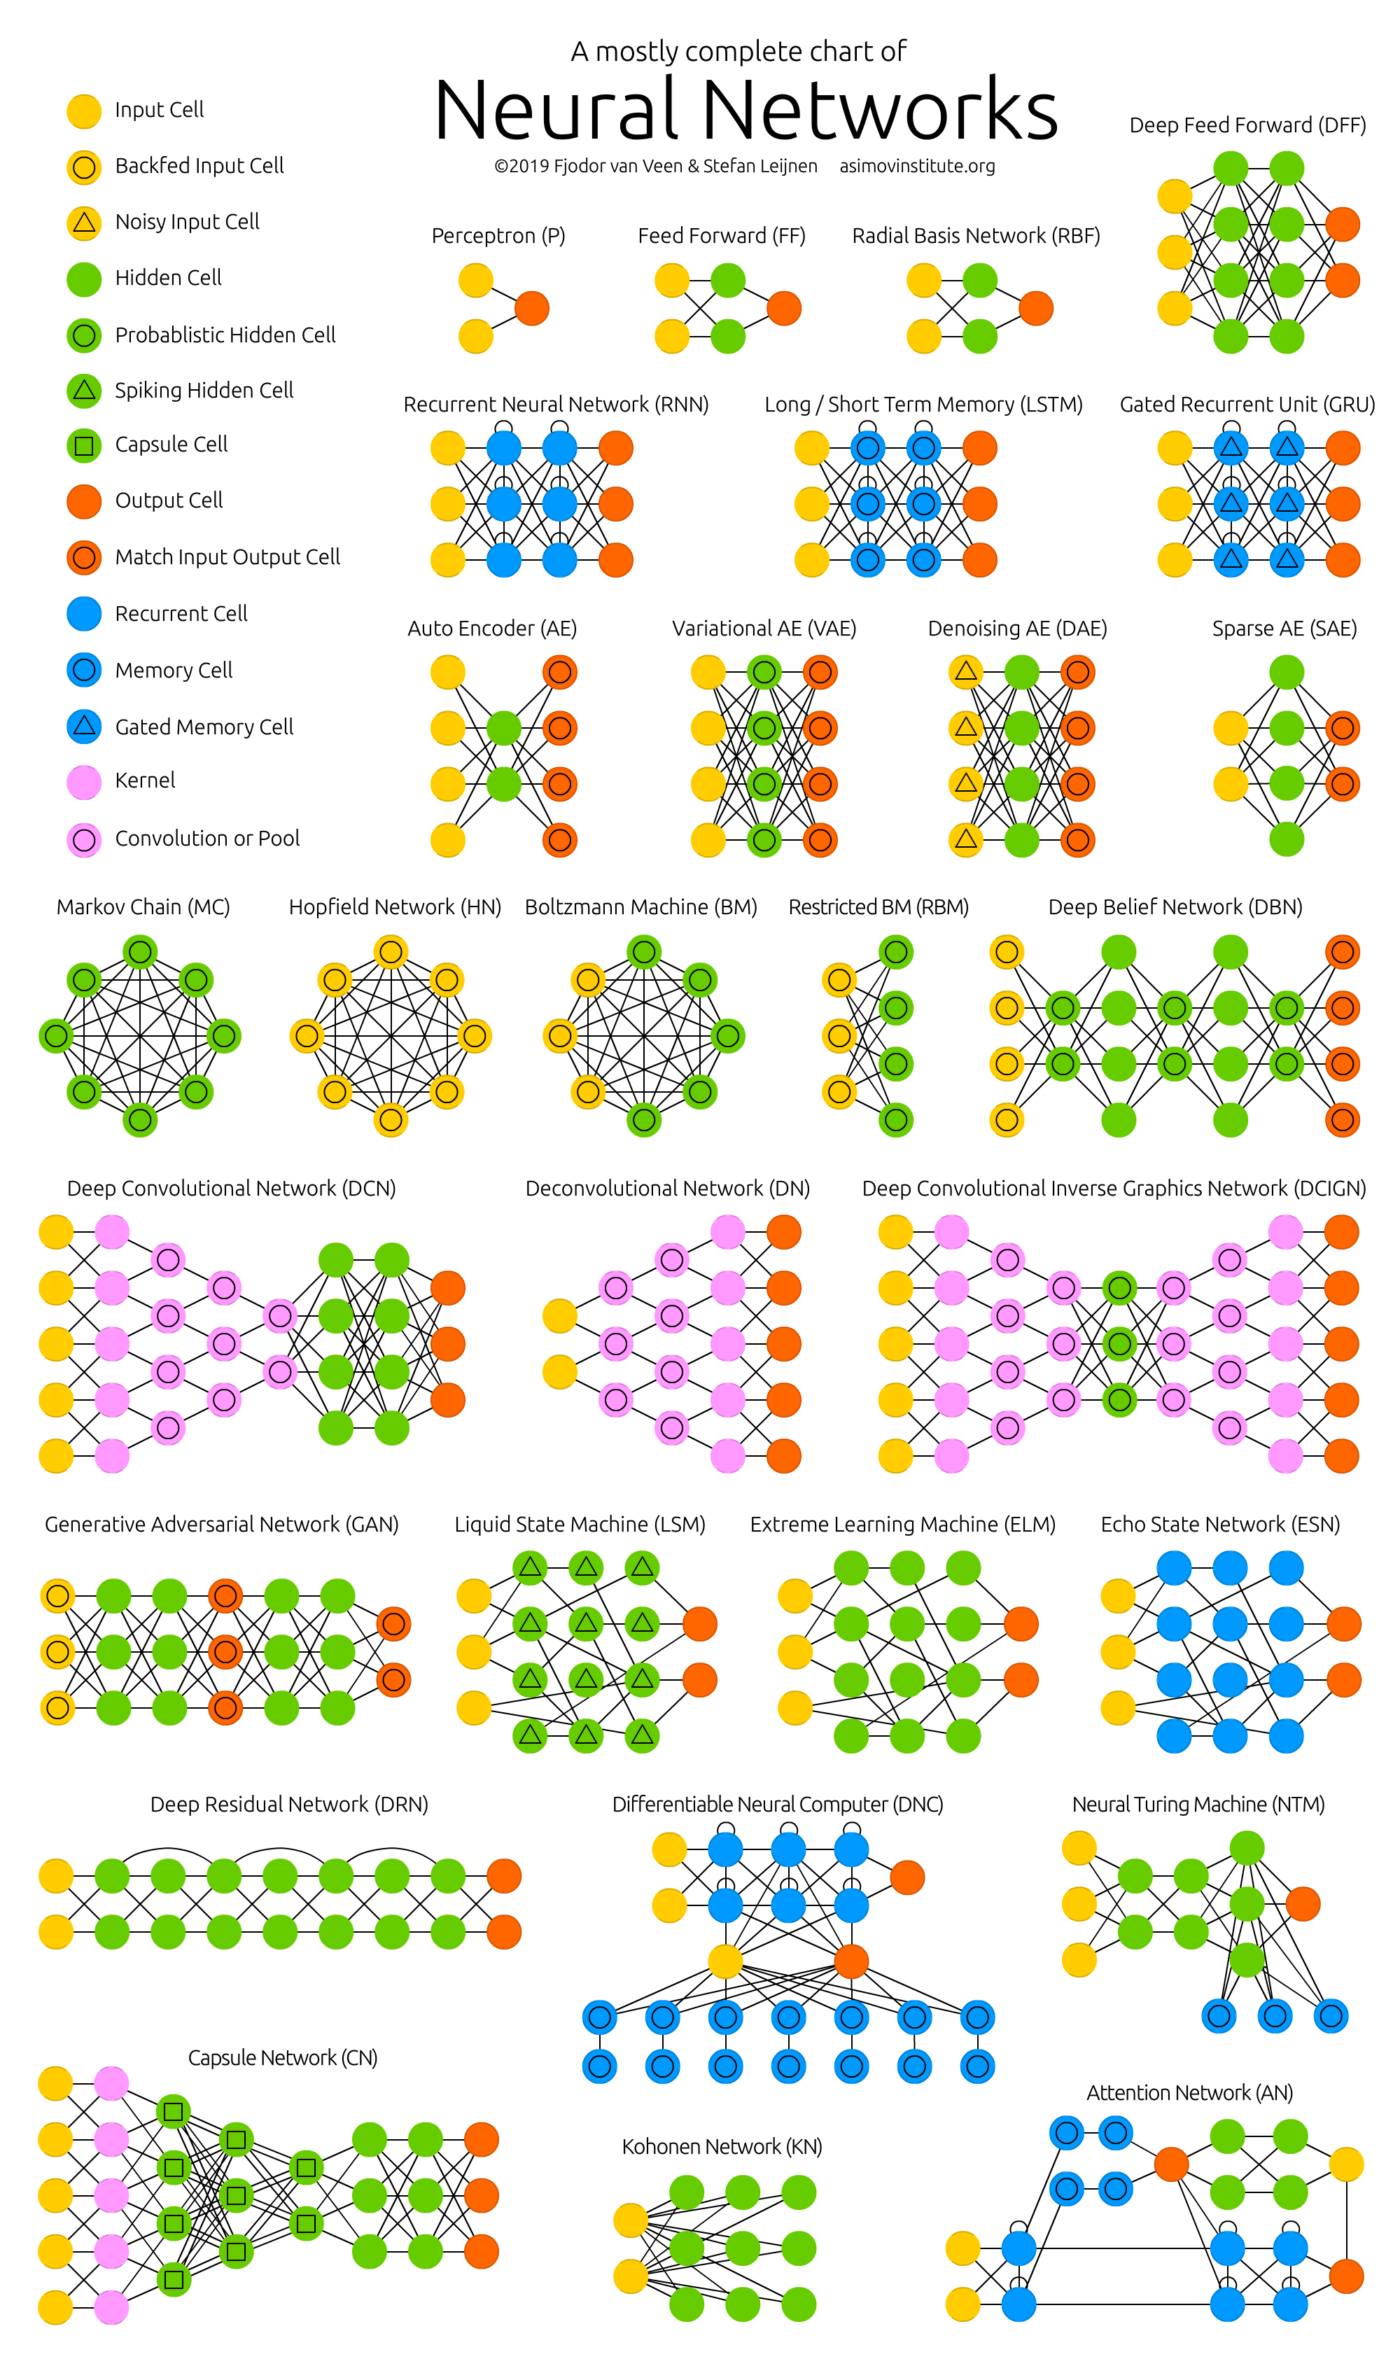

## 모델 정의

### `nn.Module` 상속 클래스 정의
- `nn.Module`을 상속받는 클래스 정의
- `__init__()`: 모델에서 사용될 모듈과 활성화 함수 등을 정의
- `forward()`: 모델에서 실행되어야 하는 연산을 정의

In [185]:
class Model(nn.Module):
    def __init__(self, inputs):
        super(Model, self).__init__()
        # 현재 우리가 사용할 layer와 activation
        self.layer = nn.Linear(inputs, 1)
        self.activation = nn.Sigmoid()
        
    def forward(self, x):
        x = self.layer(x)
        x = self.activation(x)
        return x

In [187]:
model = Model(1)
print(list(model.children()))
print(list(model.modules()))

[Linear(in_features=1, out_features=1, bias=True), Sigmoid()]
[Model(
  (layer): Linear(in_features=1, out_features=1, bias=True)
  (activation): Sigmoid()
), Linear(in_features=1, out_features=1, bias=True), Sigmoid()]


### `nn.Sequential`을 이용한 신경망 정의
- `nn.Sequential` 객체로 그 안에 각 모듈을 순차적으로 실행
- `__init__()`에서 사용할 네트워크 모델들을 `nn.Sequential`로 정의 가능
- `forward()`에서 실행되어야 할 계산을 가독성 높게 작성 가능

In [189]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )
        
        self.layer3 = nn.Sequential(
            nn.Linear(in_features=30*5*5, out_features=10, bias=True),
            nn.ReLU(inplace=True)
        )
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.shape[0], -1) # 맨 처음값 기준으로 하고 나머지는 알아서
        x = self.layer3(x)
        return x

In [190]:
model = Model()
print(list(model.children()))
print(list(model.modules()))

[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]
[Model(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=750, out_features=10, bias=True)
    (1): ReLU(inplace=True)
  )
), Sequential(
  (

### 파이토치 사전학습 모델

* https://pytorch.org/vision/stable/models.html

## 모델 파라미터

### 손실 함수(Loss function)

* 예측 값과 실제 값 사이의 오차 측정
* 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표
* 모델이 훈련되는 동안 최소화될 값으로 주어진 문제에 대한 성공 지표
* 손실 함수에 따른 결과를 통해 학습 파라미터를 조정
* 최적화 이론에서 최소화 하고자 하는 함수
* 미분 가능한 함수 사용
* 파이토치의 주요 손실 함수
  - `torch.nn.BCELoss`: 이진 분류를 위해 사용
  - `torch.nn.CrossEntropyLoss`: 다중 클래스 분류를 위해 사용
  - `torch.nn.MSELoss`: 회귀 모델에서 사용

In [191]:
criterion = nn.MSELoss()
criterion = nn.CrossEntropyLoss()

### 옵티마이저(Optimizer)

* 손실 함수를 기반으로 모델이 어떻게 업데이트되어야 하는지 결정 (특정 종류의 확률적 경사 하강법 구현)
* **optimizer**는 `step()`을 통해 전달받은 파라미터를 모델 업데이트
* 모든 옵티마이저의 기본으로 `torch.optim.Optimizer(params, defaults)` 클래스 사용
* `zero_grad()`를 이용해 옵티마이저에 사용된 파라미터들의 기울기를 0으로 설정
* `torch.optim.lr_scheduler`를 이용해 에포크(epochs)에 따라 학습률(learning rate) 조절
* 파이토치의 주요 옵티마이저: `optim.Adadelta`, `optim.Adagrad`, `optim.Adam`, `optim.RMSprop`, `optim.SGD`

<img src="https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile25.uf.tistory.com%2Fimage%2F222B4F4F562BD0330EA41C">

### 학습률 스케줄러(Learning rate scheduler)

* 학습시 특정 조건에 따라 학습률을 조정하여 최적화 진행
* 일정 횟수 이상이 되면 학습률을 감소(decay)시키거나 전역 최소점(global minimum) 근처에 가면 학습률을 줄이는 등
* 파이토치의 학습률 스케줄러 종류
  - `optim.lr_scheduler.LambdaLR`: 람다(lambda) 함수를 이용해 그 결과를 학습률로 설정
  - `optim.lr_scheduler.StepLR`: 단계(step)마다 학습률을 감마(gamma) 비율만큼 감소
  - `optim.lr_scheduler.MultiStepLR`: `StepLR`과 비슷하지만 특정 단계가 아니라 지정된 에포크에만 감마 비율로 감소
  - `optim.lr_scheduler.ExponentialLR`: 에포크마다 이전 학습률에 감마만큼 곱함
  - `optim.lr_scheduler.CosineAnnealingLR`: 학습률을 코사인(cosine) 함수의 형태처럼 변화시켜 학습률일 커지기도 하고 작아지기도 함
  - `optim.lr_scheduler.ReduceLROnPlateau`: 학습이 잘되는지 아닌지에 따라 동적으로 학습률 변화

### 지표(Metrics)

* 모델의 학습과 테스트 단계를 모니터링

In [193]:
# !pip install torchmetrics

In [201]:
import torchmetrics

preds = torch.randn(10, 5).softmax(dim=-1) # 마지막 차원 선택 
target = torch.randint(5, (10, ))
print(preds, target)

acc = torchmetrics.functional.accuracy(preds, target, task='multiclass', num_classes=5)
print(acc)

tensor([[0.4423, 0.2369, 0.0087, 0.2174, 0.0946],
        [0.0561, 0.0268, 0.1076, 0.2280, 0.5815],
        [0.1415, 0.5884, 0.0704, 0.1829, 0.0167],
        [0.2595, 0.1019, 0.0882, 0.0460, 0.5045],
        [0.3411, 0.2829, 0.1514, 0.0577, 0.1670],
        [0.2788, 0.0684, 0.1047, 0.1324, 0.4157],
        [0.2306, 0.0196, 0.0871, 0.3089, 0.3537],
        [0.0552, 0.0376, 0.2496, 0.1857, 0.4719],
        [0.0334, 0.0062, 0.5823, 0.0067, 0.3714],
        [0.3467, 0.1050, 0.0159, 0.4834, 0.0490]]) tensor([3, 1, 2, 3, 3, 2, 0, 3, 1, 1])
tensor(0.)


In [203]:
metrics = torchmetrics.Accuracy(task='multiclass', num_classes=5)

n_batches = 10
for i in range(n_batches):
    preds = torch.randn(10, 5).softmax(dim=-1) # 마지막 차원 선택 
    target = torch.randint(5, (10, ))

    acc = metrics(preds, target)
    print(acc)
    
acc = metrics.compute()
print(acc)

tensor(0.2000)
tensor(0.2000)
tensor(0.1000)
tensor(0.2000)
tensor(0.2000)
tensor(0.1000)
tensor(0.2000)
tensor(0.3000)
tensor(0.3000)
tensor(0.2000)
tensor(0.2000)


## 선형 회귀 모델(Linear Regression Model)

### 데이터 생성

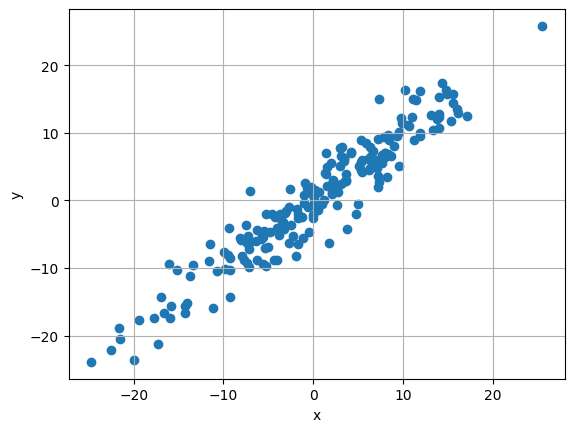

In [204]:
X = torch.randn(200, 1) * 10
y = X + 3 * torch.randn(200, 1)
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

### 모델 정의 및 파라미터

In [215]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)
        
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [216]:
model = LinearRegressionModel()
print(model)
print(list(model.parameters()))

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[-0.8952]], requires_grad=True), Parameter containing:
tensor([-0.8965], requires_grad=True)]


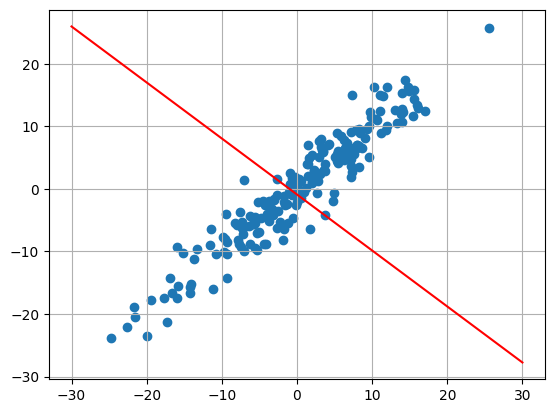

In [217]:
w, b = model.parameters()

w1, b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30, 30])
y1 = w1 * x1 + b1

plt.plot(x1, y1, 'r')
plt.scatter(X, y)
plt.grid()
plt.show()

### 손실 함수 및 옵티마이저

In [218]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

### 모델 학습

In [219]:
epochs = 100
losses = []

for epoch in range(epochs):
    
    optimizer.zero_grad()
    
    y_pred = model(X)
    loss = criterion(y_pred, y)
    losses.append(loss.item())
    loss.backward() # backpropagation
    
    optimizer.step() # 다음 스텝으로

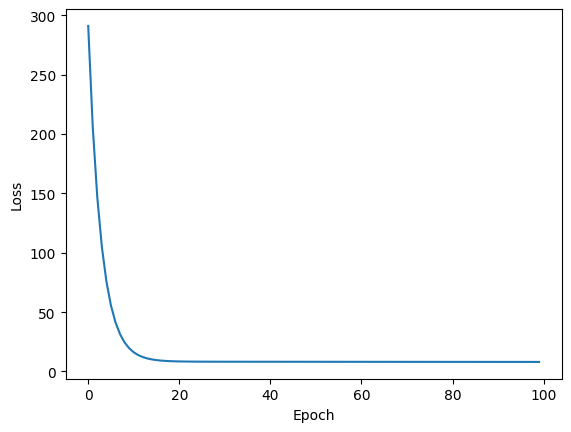

In [220]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

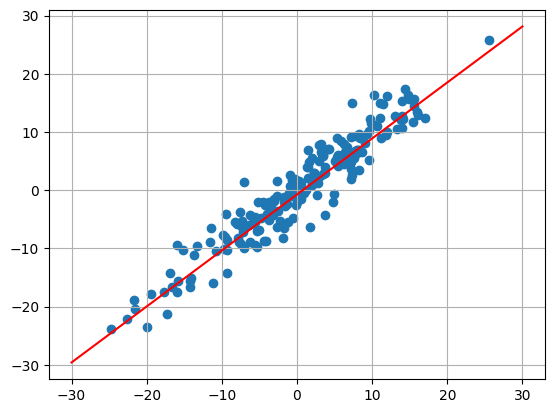

In [221]:
w1, b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30, 30])
y1 = w1 * x1 + b1

plt.plot(x1, y1, 'r')
plt.scatter(X, y)
plt.grid()
plt.show()

## FashionMNIST 분류 모델

GPU 설정

In [222]:
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
device

device(type='mps')

### 데이터 로드

In [223]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5, ))])

In [230]:
trainset = datasets.FashionMNIST(root='./mnist/',
                                 train=True,
                                 download=True,
                                 transform=transform)

testset = datasets.FashionMNIST(root='./mnist/',
                                train=False,
                                download=True,
                                transform=transform)

Processing...
Done!
Processing...
Done!


In [231]:
train_loader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=128, shuffle=True, num_workers=2)

In [232]:
images, labels = next(iter(train_loader))
images.shape, labels.shape

/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/torchvision/transforms/functional.py:63: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))


(torch.Size([128, 1, 28, 28]), torch.Size([128]))

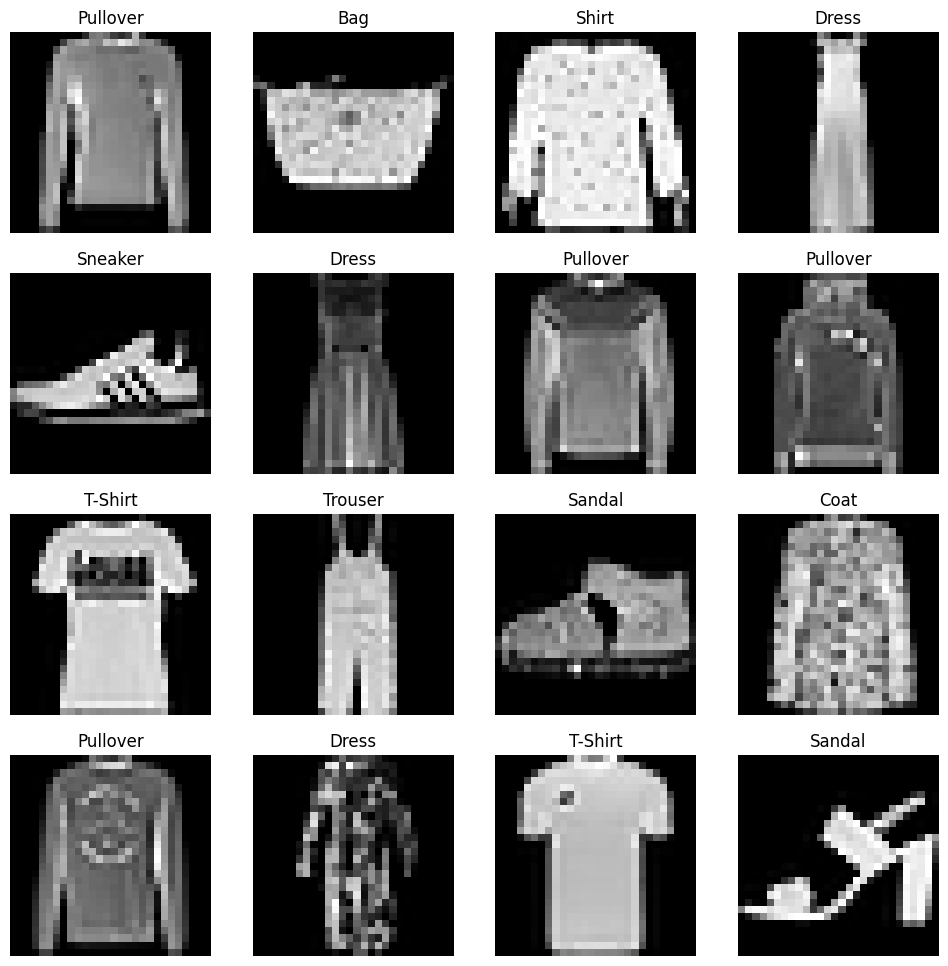

In [233]:
labels_map = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot',
}

figure = plt.figure(figsize=(12, 12))
cols, rows = 4, 4
for i in range(1, cols*rows+1):
    image = images[i].squeeze() # 맨 앞 차원 제거
    label_idx = labels[i].item() # 숫자
    label = labels_map[label_idx]
    
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(image, cmap='gray')
    
plt.show()

### 모델 정의 및 파라미터

In [234]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16 , 3)
        self.fc1 = nn.Linear(in_features=16 * 5 * 5, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x)) # linear 에 들어가기 전에 view
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
            
        return num_features
    
net = NeuralNet()
print(net)

NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [235]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [236]:
input = torch.randn(1, 1, 28, 28)
out = net(input)
print(out)

tensor([[-0.0709,  0.1388, -0.0410,  0.0384, -0.0115, -0.1332, -0.1959,  0.0154,
         -0.0611, -0.0530]], grad_fn=<AddmmBackward0>)


### 손실함수와 옵티마이저

In [238]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 모델 학습

배치수 확인

In [239]:
total_batch = len(train_loader)
print(total_batch)

469


In [242]:
for epoch in range(10):
    
    running_loss = 0.0
    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data 
        
        optimizer.zero_grad()
        
        output = net(inputs)
        loss = criterion(output, labels)
        loss.backward() # backpropagation
        optimizer.step() # 최적화
        
        running_loss += loss.item()
        
        if i % 100 == 99:
            print(f'Epoch: {epoch+1}, Iter: {i+1}, Loss: {running_loss/2000}')
            running_loss = 0.0

Epoch: 1, Iter: 100, Loss: 0.11512808775901795
Epoch: 1, Iter: 200, Loss: 0.11493761360645294
Epoch: 1, Iter: 300, Loss: 0.11478195869922637
Epoch: 1, Iter: 400, Loss: 0.11456336808204651


/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/torchvision/transforms/functional.py:63: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/torchvision/transforms/functional.py:63: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))


Epoch: 2, Iter: 100, Loss: 0.11377916395664216
Epoch: 2, Iter: 200, Loss: 0.11277953481674194
Epoch: 2, Iter: 300, Loss: 0.11052257323265076
Epoch: 2, Iter: 400, Loss: 0.10404657226800919


/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/torchvision/transforms/functional.py:63: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/torchvision/transforms/functional.py:63: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))


Epoch: 3, Iter: 100, Loss: 0.06826890766620636
Epoch: 3, Iter: 200, Loss: 0.054583379328250886
Epoch: 3, Iter: 300, Loss: 0.04777007243037224
Epoch: 3, Iter: 400, Loss: 0.04292275238037109


/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/torchvision/transforms/functional.py:63: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/torchvision/transforms/functional.py:63: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))


Epoch: 4, Iter: 100, Loss: 0.03925313702225685
Epoch: 4, Iter: 200, Loss: 0.03726119008660316
Epoch: 4, Iter: 300, Loss: 0.03570305708050728
Epoch: 4, Iter: 400, Loss: 0.03453505909442901


/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/torchvision/transforms/functional.py:63: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/torchvision/transforms/functional.py:63: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))


Epoch: 5, Iter: 100, Loss: 0.0332145459651947
Epoch: 5, Iter: 200, Loss: 0.03313809226453304
Epoch: 5, Iter: 300, Loss: 0.03148493167757988
Epoch: 5, Iter: 400, Loss: 0.03096596446633339


/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/torchvision/transforms/functional.py:63: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/torchvision/transforms/functional.py:63: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))


Epoch: 6, Iter: 100, Loss: 0.030797284498810768
Epoch: 6, Iter: 200, Loss: 0.02991213071346283
Epoch: 6, Iter: 300, Loss: 0.028686011254787445
Epoch: 6, Iter: 400, Loss: 0.028257766231894493


/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/torchvision/transforms/functional.py:63: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/torchvision/transforms/functional.py:63: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))


Epoch: 7, Iter: 100, Loss: 0.02762442545592785
Epoch: 7, Iter: 200, Loss: 0.02788355441391468
Epoch: 7, Iter: 300, Loss: 0.02675255674123764
Epoch: 7, Iter: 400, Loss: 0.026907618060708047


/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/torchvision/transforms/functional.py:63: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/torchvision/transforms/functional.py:63: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))


Epoch: 8, Iter: 100, Loss: 0.027068251594901085
Epoch: 8, Iter: 200, Loss: 0.025558958902955054
Epoch: 8, Iter: 300, Loss: 0.026570306047797202
Epoch: 8, Iter: 400, Loss: 0.025919153451919554


/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/torchvision/transforms/functional.py:63: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/torchvision/transforms/functional.py:63: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))


Epoch: 9, Iter: 100, Loss: 0.024912295505404473
Epoch: 9, Iter: 200, Loss: 0.025416207388043403
Epoch: 9, Iter: 300, Loss: 0.02497250106930733
Epoch: 9, Iter: 400, Loss: 0.024718066453933717


/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/torchvision/transforms/functional.py:63: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/torchvision/transforms/functional.py:63: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))


Epoch: 10, Iter: 100, Loss: 0.024863963216543196
Epoch: 10, Iter: 200, Loss: 0.023233711302280427
Epoch: 10, Iter: 300, Loss: 0.02416481877863407
Epoch: 10, Iter: 400, Loss: 0.023674408465623856


/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/torchvision/transforms/functional.py:63: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/torchvision/transforms/functional.py:63: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))


### 모델의 저장 및 로드

- `torch.save`: `net.state_dict()`를 저장
- `torch.load`: `load_state_dict`로 모델을 로드

In [243]:
path = './fashion_mnist.pth'
torch.save(net.state_dict(), path)

In [247]:
torch.load(path)

OrderedDict([('conv1.weight',
              tensor([[[[ 0.2818,  0.5624,  0.4873],
                        [ 0.1543,  0.1294,  0.0461],
                        [ 0.4938,  0.3967,  0.4669]]],
              
              
                      [[[-0.3251, -0.4031, -0.6069],
                        [-0.2973, -0.3664, -0.8726],
                        [-0.2024, -0.8233, -0.6924]]],
              
              
                      [[[-0.0924,  0.3335,  0.3540],
                        [-0.3505,  0.3338,  0.1059],
                        [-0.4112,  0.3628,  0.3486]]],
              
              
                      [[[ 0.1543, -0.0983, -0.3194],
                        [ 0.1588,  0.1001,  0.3485],
                        [ 0.2586,  0.4224, -0.2671]]],
              
              
                      [[[ 0.3542,  0.1376, -0.1832],
                        [ 0.2803,  0.3051,  0.2640],
                        [-0.2177, -0.3548, -0.0118]]],
              
              
               

In [244]:
net = NeuralNet()
net.load_state_dict(torch.load(path))

<All keys matched successfully>

In [246]:
net.parameters

<bound method Module.parameters of NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

### 모델 테스트

In [248]:
def imshow(image):
    image = image / 2 + 0.5
    npimg = image.numpy()
    
    fig = plt.figure(figsize=(16, 8))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

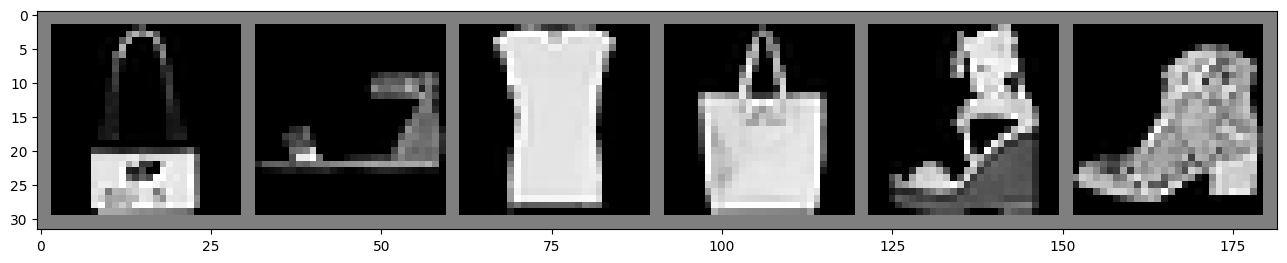

In [249]:
import torchvision

dataiter = iter(test_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:6]))

In [251]:
outputs = net(images)

_, predicted = torch.max(outputs, 1)
print(predicted)

tensor([8, 5, 6, 8, 5, 9, 2, 3, 5, 1, 3, 3, 7, 1, 6, 0, 0, 4, 7, 0, 7, 5, 4, 1,
        6, 7, 9, 5, 3, 7, 5, 2, 6, 9, 0, 5, 6, 7, 8, 3, 5, 5, 5, 1, 9, 6, 9, 0,
        9, 9, 5, 5, 1, 1, 0, 3, 5, 8, 8, 4, 4, 0, 5, 8, 7, 9, 3, 3, 1, 3, 0, 4,
        3, 4, 2, 3, 9, 1, 0, 8, 1, 5, 4, 5, 8, 0, 6, 8, 0, 8, 3, 5, 2, 7, 8, 7,
        2, 5, 3, 7, 8, 1, 1, 3, 9, 1, 2, 7, 9, 3, 5, 1, 5, 1, 9, 3, 5, 3, 3, 5,
        6, 1, 4, 8, 2, 8, 4, 2])


In [253]:
# 정답
print(labels)

tensor([8, 5, 0, 8, 5, 9, 2, 3, 5, 1, 4, 4, 5, 1, 4, 0, 0, 4, 7, 0, 7, 5, 2, 1,
        4, 7, 9, 5, 0, 7, 5, 4, 6, 7, 0, 5, 4, 7, 8, 3, 5, 5, 5, 1, 9, 6, 9, 0,
        9, 9, 5, 5, 1, 1, 0, 4, 5, 8, 8, 4, 2, 0, 5, 8, 7, 9, 3, 0, 1, 1, 0, 4,
        6, 4, 4, 4, 9, 1, 0, 8, 1, 5, 4, 5, 8, 6, 4, 8, 6, 8, 3, 5, 6, 9, 8, 7,
        4, 5, 3, 7, 8, 1, 1, 3, 9, 1, 6, 7, 9, 3, 5, 1, 5, 1, 9, 3, 5, 3, 3, 5,
        8, 1, 6, 8, 2, 8, 4, 2])


In [256]:
print(''.join('{}, '.format(labels_map[int(predicted[j].numpy())]) for j in range(6)))

Bag, Sandal, Shirt, Bag, Sandal, Ankle Boot, 


In [257]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print(100 * correct / total)

81.56


/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/torchvision/transforms/functional.py:63: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/torchvision/transforms/functional.py:63: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
